In [1]:
# Dependencies
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress


In [2]:
#Read in data and combine

boxoffice_1 = pd.DataFrame(pd.read_csv('CSVs/boxoffice_1.csv'))
boxoffice_2 = pd.DataFrame(pd.read_csv('CSVs/boxoffice_2.csv'))
boxoffice_3 = pd.DataFrame(pd.read_csv('CSVs/boxoffice_3.csv'))
boxoffice_4 = pd.DataFrame(pd.read_csv('CSVs/boxoffice_4.csv'))
boffice_1 = boxoffice_1['0'].tolist()
boffice_2 = boxoffice_2['0'].tolist()
boffice_3 = boxoffice_3['0'].tolist()
boffice_4 = boxoffice_4['0'].tolist()
boffice = boffice_4 + boffice_3 + boffice_2 + boffice_1

imdb_score_1 = pd.DataFrame(pd.read_csv('CSVs/imdb_score_1.csv'))
imdb_score_2 = pd.DataFrame(pd.read_csv('CSVs/imdb_score_2.csv'))
imdb_score_3 = pd.DataFrame(pd.read_csv('CSVs/imdb_score_3.csv'))
imdb_score_4 = pd.DataFrame(pd.read_csv('CSVs/imdb_score_4.csv'))
imdb_1 = imdb_score_1['0'].tolist()
imdb_2 = imdb_score_2['0'].tolist()
imdb_3 = imdb_score_3['0'].tolist()
imdb_4 = imdb_score_4['0'].tolist()
imdb = imdb_4 + imdb_3 + imdb_2 + imdb_1

meta_score_1 = pd.DataFrame(pd.read_csv('CSVs/meta_score_1.csv'))
meta_score_2 = pd.DataFrame(pd.read_csv('CSVs/meta_score_2.csv'))
meta_score_3 = pd.DataFrame(pd.read_csv('CSVs/meta_score_3.csv'))
meta_score_4 = pd.DataFrame(pd.read_csv('CSVs/meta_score_4.csv'))
meta_1 = meta_score_1['0'].tolist()
meta_2 = meta_score_2['0'].tolist()
meta_3 = meta_score_3['0'].tolist()
meta_4 = meta_score_4['0'].tolist()
meta = meta_4 + meta_3 + meta_2 + meta_1

rot_score_1 = pd.DataFrame(pd.read_csv('CSVs/rot_score_1.csv'))
rot_score_2 = pd.DataFrame(pd.read_csv('CSVs/rot_score_2.csv'))
rot_score_3 = pd.DataFrame(pd.read_csv('CSVs/rot_score_3.csv'))
rot_score_4 = pd.DataFrame(pd.read_csv('CSVs/rot_score_4.csv'))
rot_1 = rot_score_1['0'].tolist()
rot_2 = rot_score_2['0'].tolist()
rot_3 = rot_score_3['0'].tolist()
rot_4 = rot_score_4['0'].tolist()
rot = rot_4 + rot_3 + rot_2 + rot_1 

#create dataframe
movies_df = pd.DataFrame(list(zip(boffice, imdb, meta, rot)))

#rename columns
movies_df.columns = ['Box Office Rev', 'IMDB', 'Metacritics','Rotten Tomatoes']

#clean rows with null values
movies_df = movies_df.dropna()

#show dataframe
movies_df.describe()

,Box Office Rev,IMDB,Metacritics,Rotten Tomatoes
count,2.044000e+03,2044.000000,2044.000000,2044.000000
mean,3.697756e+07,6.626272,60.917319,67.568493
std,6.943775e+07,0.889994,16.867527,25.557125
min,1.034000e+03,2.100000,9.000000,0.000000
25%,2.518370e+05,6.100000,50.000000,50.000000
50%,5.752008e+06,6.700000,63.000000,75.000000
75%,4.240263e+07,7.300000,73.000000,89.000000
max,6.788155e+08,9.300000,100.000000,100.000000


In [11]:
#clean rows with score of 0
clean_df = movies_df[movies_df['Rotten Tomatoes'] != 0 ]

The correlation strength between Rotten Tomatoes score and boxoffice earnings is 0.04
The equation of the line is Y = 103282.79x + 30114373.77


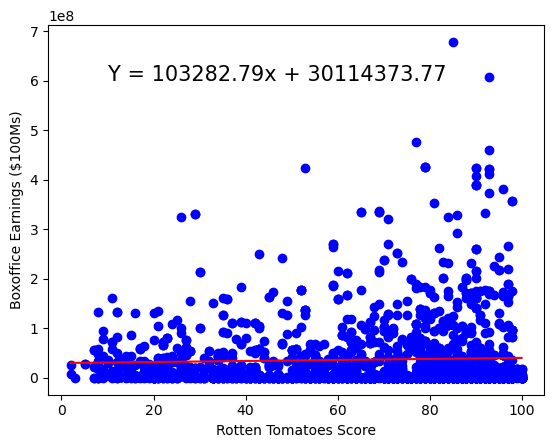

In [13]:
#Rotten Tomatoes Score vs Block Office Success
#Sort dataframe for Rotten Tomatoes scores
sorted_rot_score = clean_df.sort_values("Rotten Tomatoes", ascending = True)

#Plot Rotten scores vs earnings
plt.scatter(sorted_rot_score['Rotten Tomatoes'], sorted_rot_score['Box Office Rev'], marker = "o", color = "blue")

#Determine strength of relationship between Rotten score and boxoffice earnings
rot_correlation = st.pearsonr(sorted_rot_score['Rotten Tomatoes'], sorted_rot_score['Box Office Rev'])
print(f"The correlation strength between Rotten Tomatoes score and boxoffice earnings is {round(rot_correlation[0],2)}") 

#Calculate regression equation and plot forecasting line
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress(sorted_rot_score['Rotten Tomatoes'], sorted_rot_score['Box Office Rev'])
regress_values3 = (sorted_rot_score['Rotten Tomatoes'])* slope3  + intercept3
line_eq3 = "Y = " + str(round(slope3,2)) + "x + " + str(round(intercept3,2))
print(f"The equation of the line is {line_eq3}")

#plot scatter
plt.plot(sorted_rot_score['Rotten Tomatoes'],regress_values3,"r-")
plt.annotate(line_eq3,(10,600000000),fontsize = 15, color = "black")
plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('Boxoffice Earnings ($100Ms)')

#show scatter plot
plt.show();


The correlation strength between IMDB score and boxoffice earnings is 0.22
The equation of the line is Y = 17153537.9x + -76680965.85


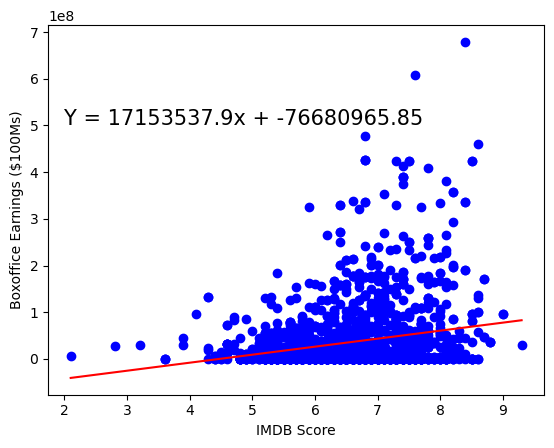

In [21]:
#Meta Score vs Block Office Success
#Sort dataframe for Meta scores
sorted_IMBD_score = clean_df.sort_values("IMDB", ascending = True)

#Plot IMDB scores vs earnings
plt.scatter(sorted_IMBD_score['IMDB'],sorted_IMBD_score['Box Office Rev'],marker = "o", color = "blue")

#Determine strenght of relationship between IMDB score and boxoffice earnings
IMDB_correlation = st.pearsonr(sorted_IMBD_score['IMDB'],sorted_IMBD_score['Box Office Rev'])
print(f"The correlation strength between IMDB score and boxoffice earnings is {round(IMDB_correlation[0],2)}") 

#Calculate regression equation and plot forecasting line
(slope, intercept, rvalue, pvalue, stderr) = linregress(sorted_IMBD_score['IMDB'],sorted_IMBD_score['Box Office Rev'])
regress_values = (sorted_IMBD_score['IMDB'])* slope  + intercept
line_eq = "Y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The equation of the line is {line_eq}")

#plot scatter
plt.plot(sorted_IMBD_score['IMDB'],regress_values,"r-")
plt.annotate(line_eq,(2.0,500000000.0),fontsize = 15, color = "black")
plt.xlabel('IMDB Score')
plt.ylabel('Boxoffice Earnings ($100Ms)')

#show scatter plot
plt.show();

The correlation strength between meta score and boxoffice earnings is 0.05
The equation of the line is y = 195130.14x + 25204867.88


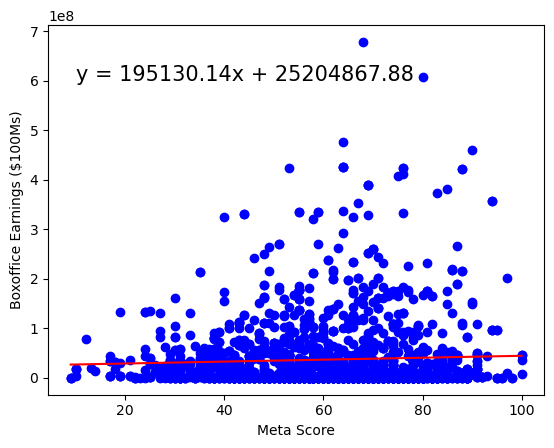

In [24]:
#Meta Score vs Block Office Success
#Sort dataframe for Meta scores
sorted_meta_score = clean_df.sort_values('Metacritics', ascending = True)

#Plot meta scores vs earnings
plt.scatter(sorted_meta_score['Metacritics'],sorted_meta_score['Box Office Rev'],marker = "o", color = "blue")

#Determine strenght of relationship between meta score and boxoffice earnings
meta_correlation = st.pearsonr(sorted_meta_score['Metacritics'],sorted_meta_score['Box Office Rev'])
print(f"The correlation strength between meta score and boxoffice earnings is {round(meta_correlation[0],2)}") 

#Calculate regression equation and plot forecasting line
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(sorted_meta_score['Metacritics'],sorted_meta_score['Box Office Rev'])
regress_values2 = (sorted_meta_score['Metacritics'])* slope2  + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))
print(f"The equation of the line is {line_eq2}")

#plot scatter
plt.plot(sorted_meta_score['Metacritics'],regress_values2,"r-")
plt.annotate(line_eq2,(10,600000000),fontsize = 15, color = "black")
plt.xlabel('Meta Score')
plt.ylabel('Boxoffice Earnings ($100Ms)')

#show scatter plot
plt.show();

In [1]:
ax.boxplot(clean_df)

NameError: name 'ax' is not defined